In [4]:
import os

root_dir = '/data/speech/digital_human/preprocessed/'

def get_files(dir):
    data = []
    files = sorted([os.path.join(dir, file) for file in os.listdir(dir)])
    for file in files:
        if file.endswith('.npy') and 'ARKit' in file:
            data.append(file)
        if os.path.isdir(file):
            data.extend(get_files(os.path.join(dir, file)))
    return data

files = get_files(root_dir)
print(len(files))


76


In [7]:
import numpy as np

data = np.load(files[0], allow_pickle=True).item()
print(data.keys())

dict_keys(['wav', 'blendshapes'])


In [10]:
print(len(data['wav']), len(data['blendshapes']))

13224206 8996


In [11]:
13224206 / 8996

1470.0095598043574

In [12]:
44100 / 30

1470.0

In [37]:
start = 1.5
end = 3.2

import IPython.display as ipd
ipd.Audio(data['wav'][int(start*44100):int(end*44100)], rate=44100)

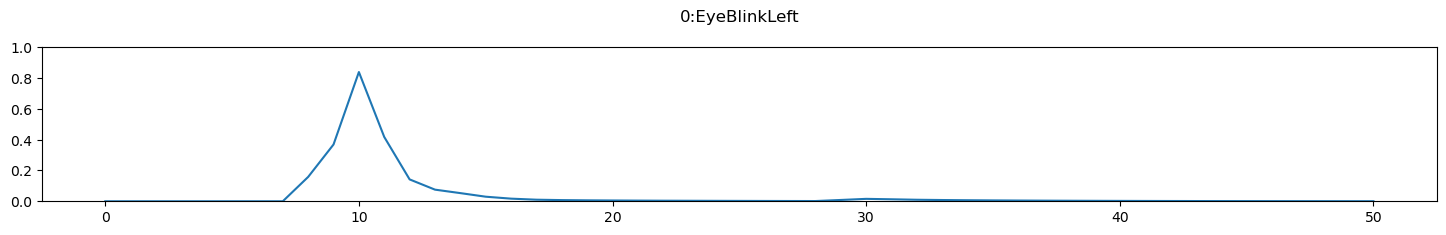

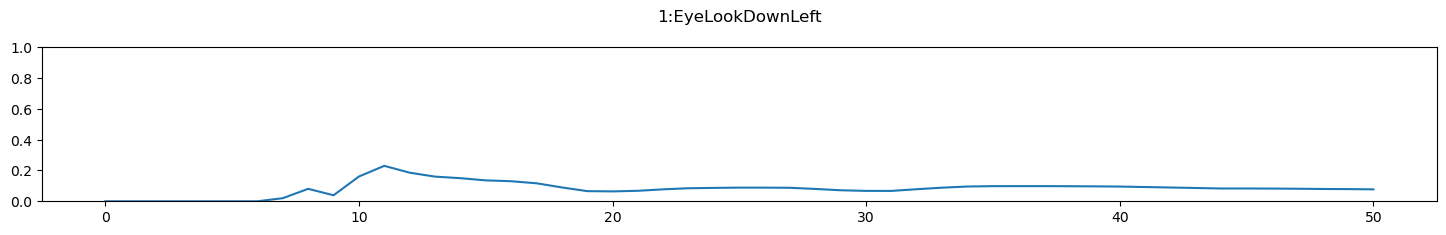

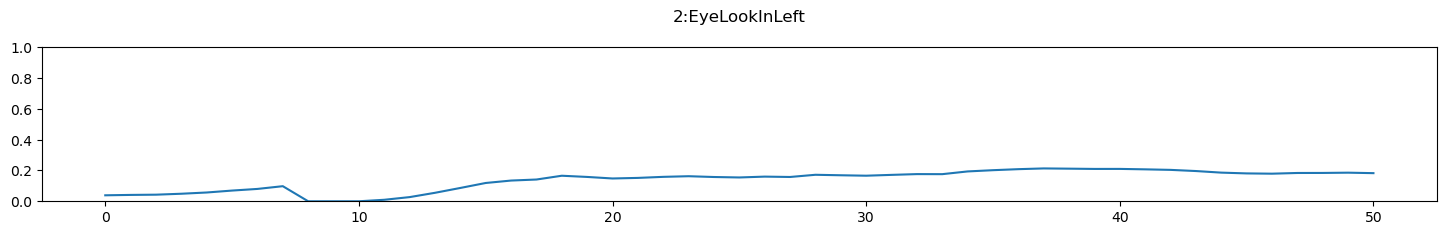

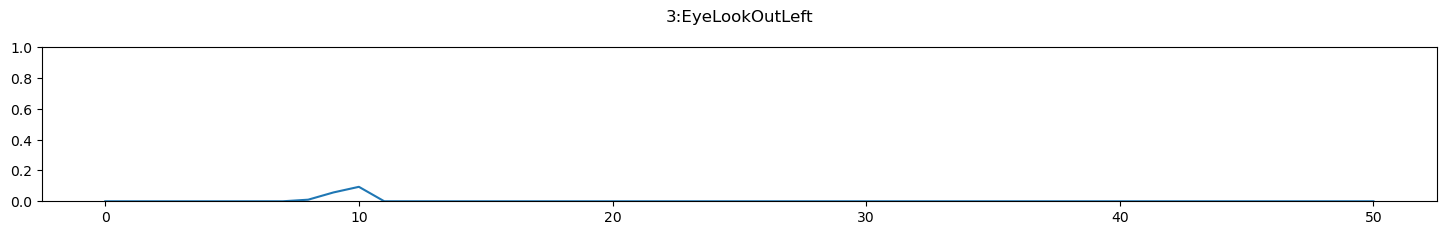

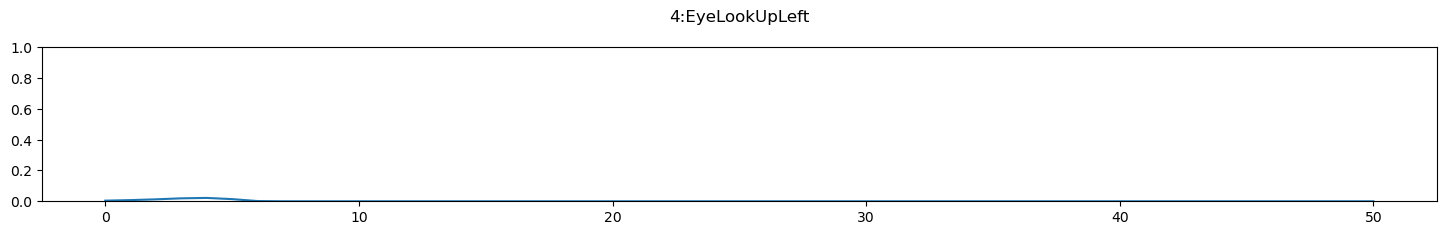

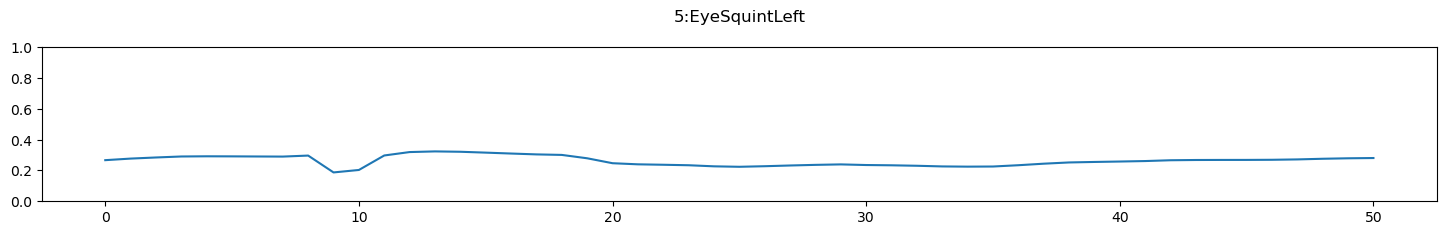

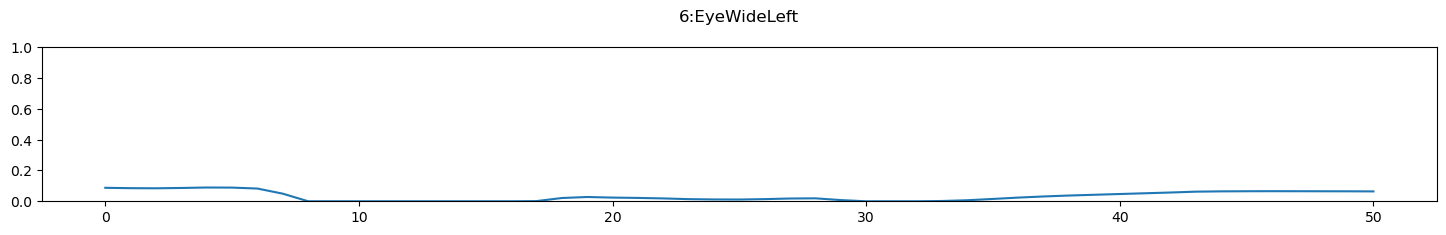

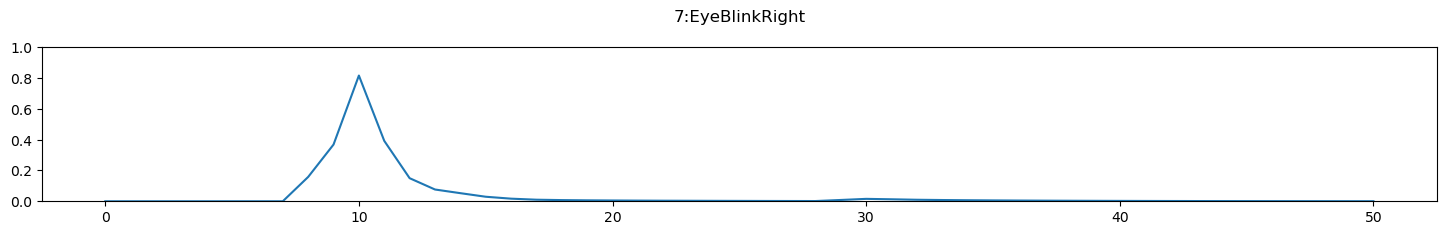

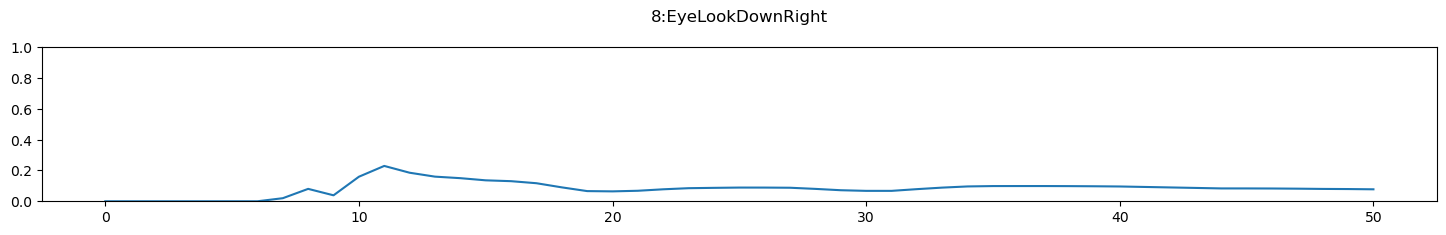

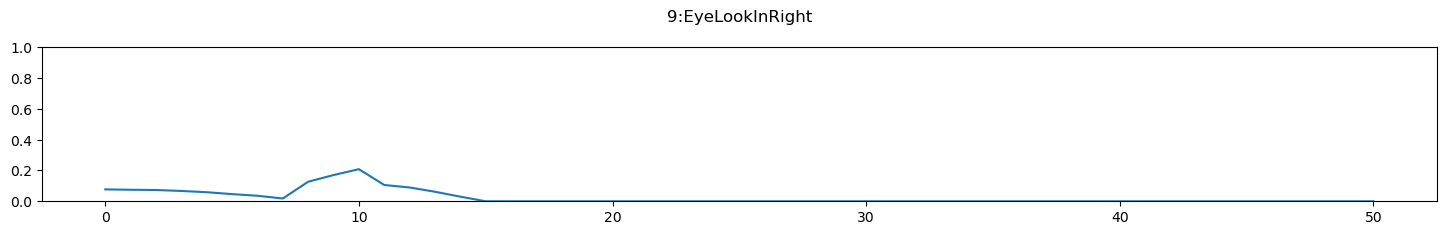

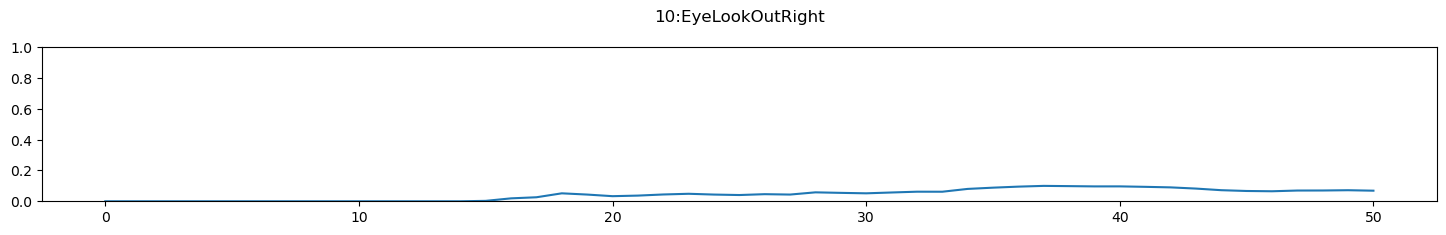

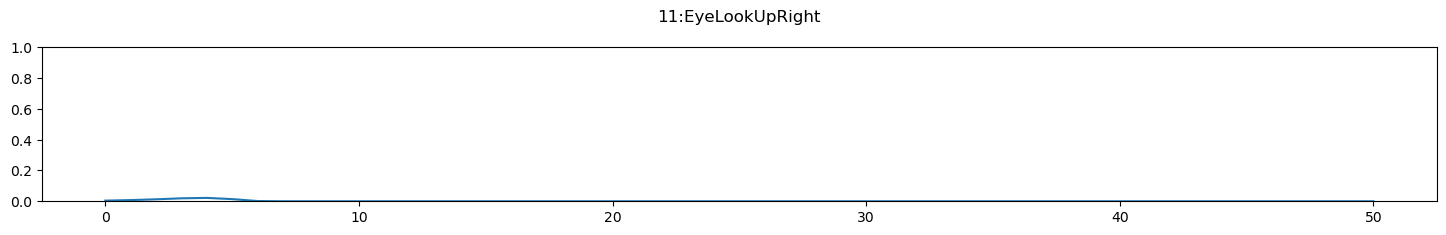

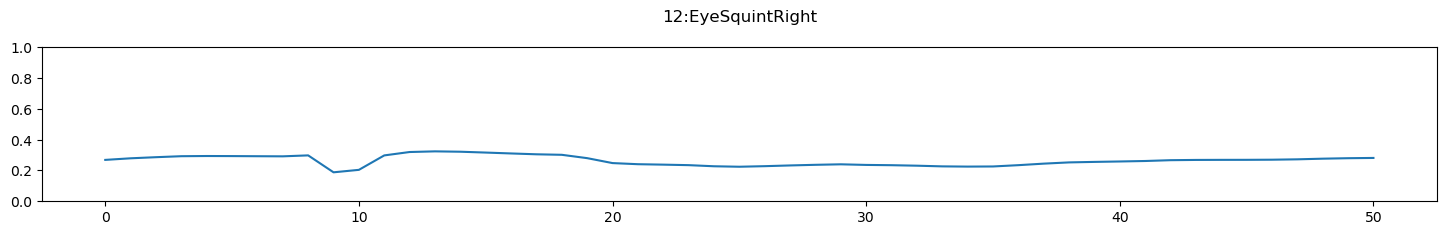

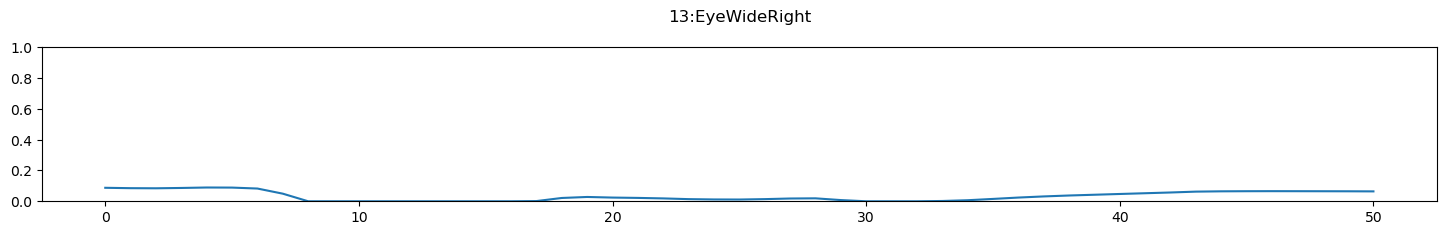

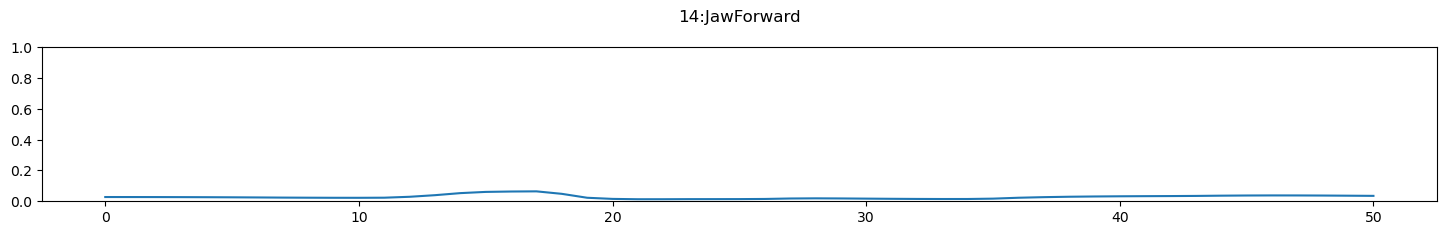

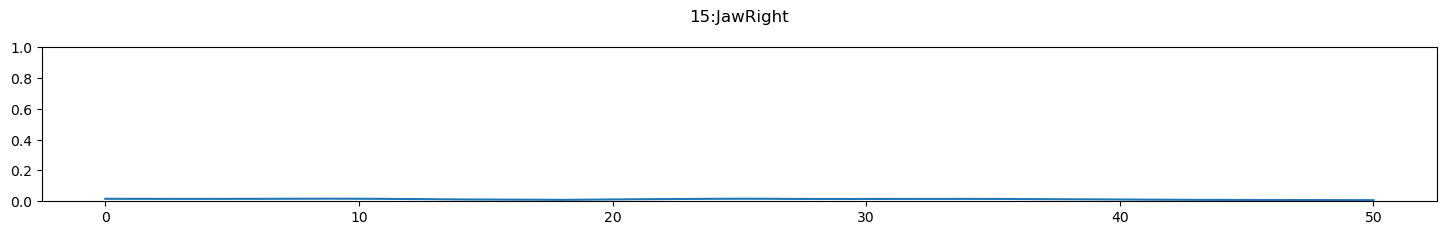

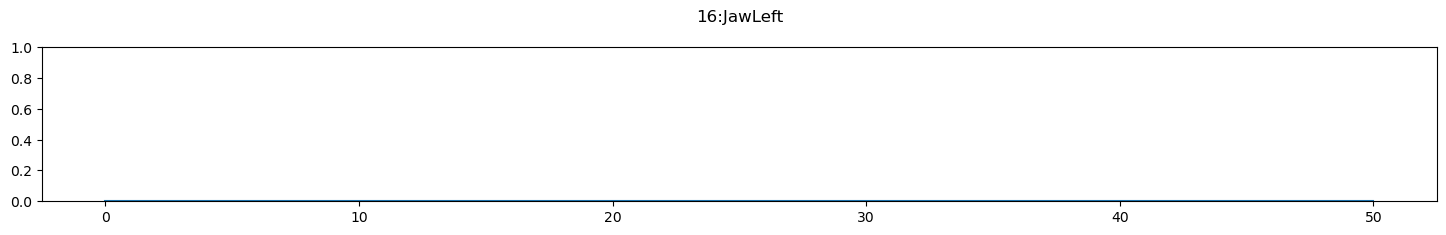

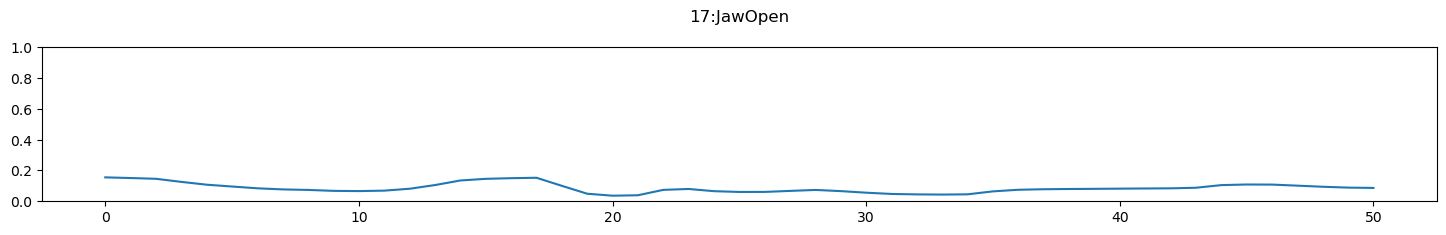

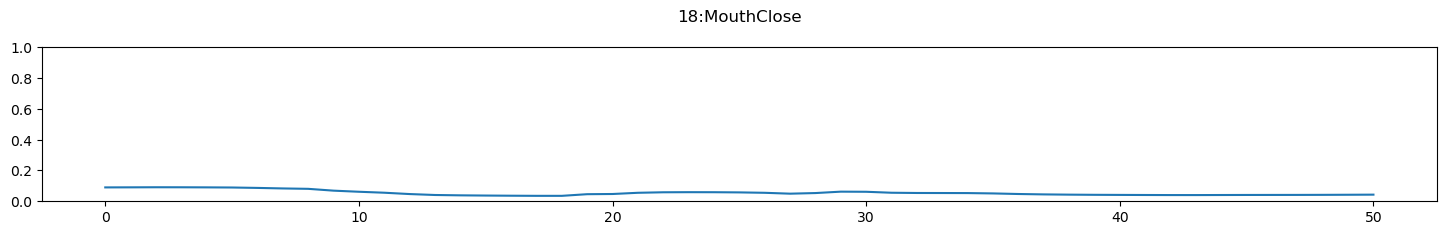

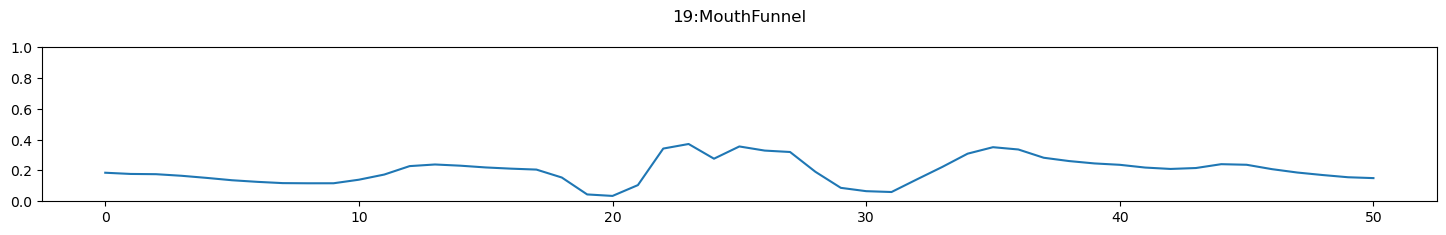

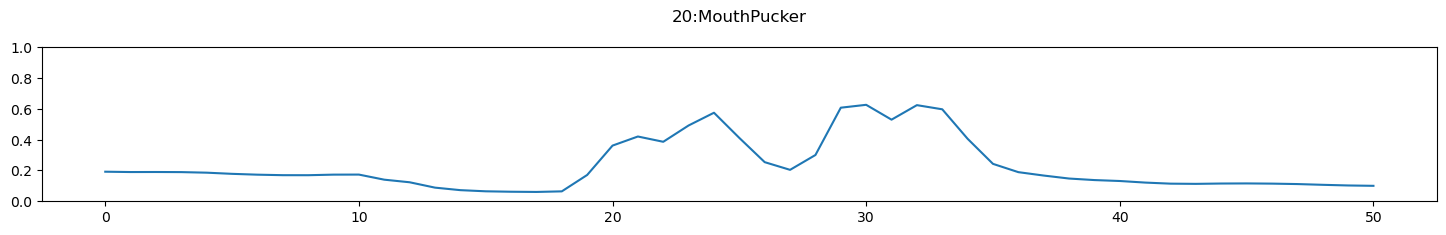

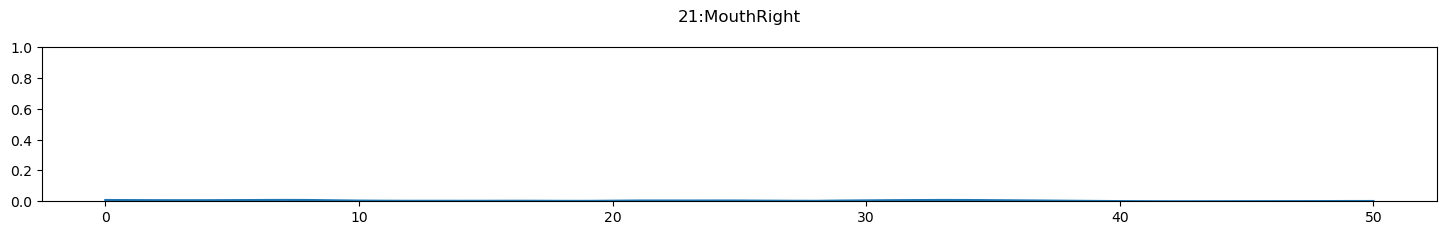

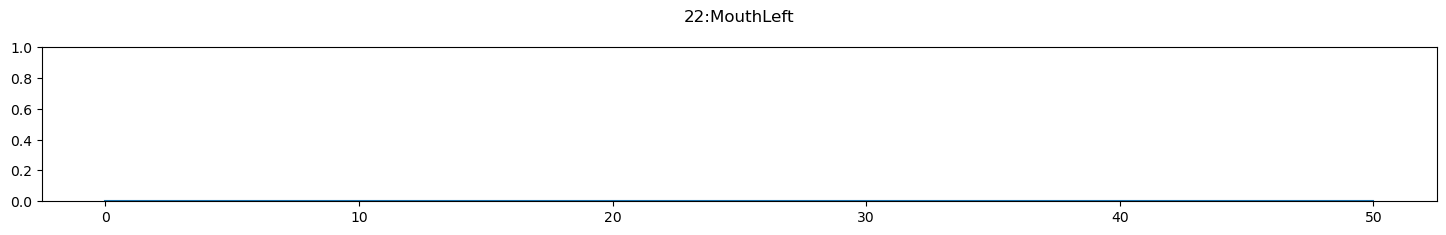

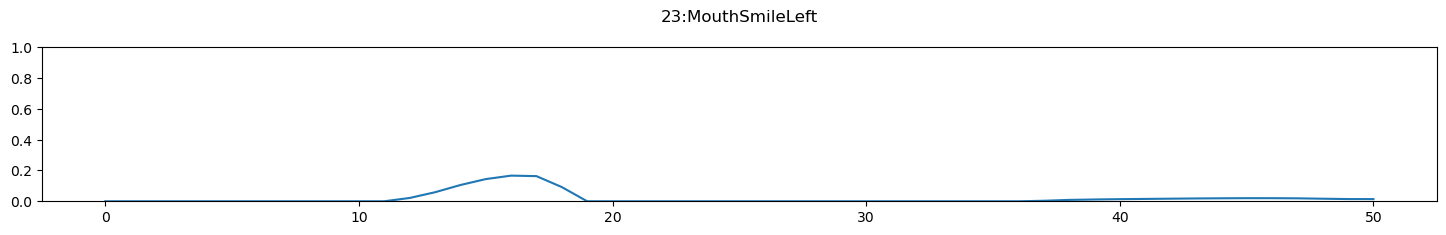

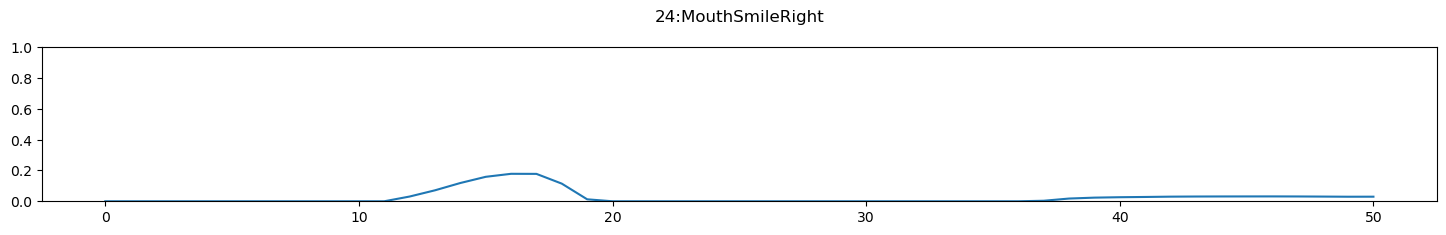

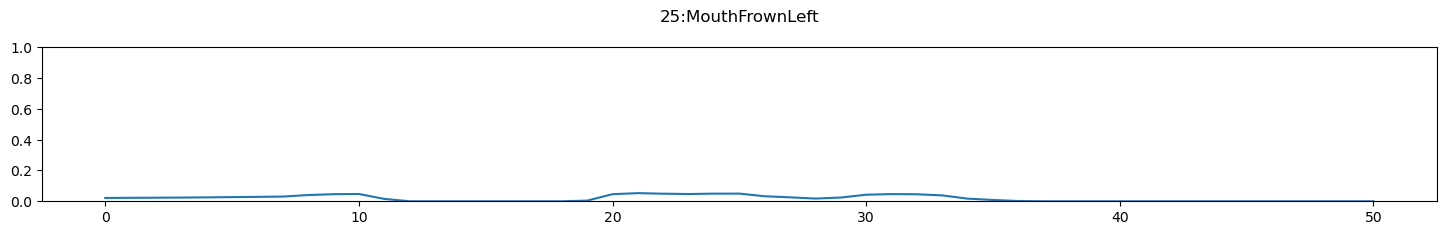

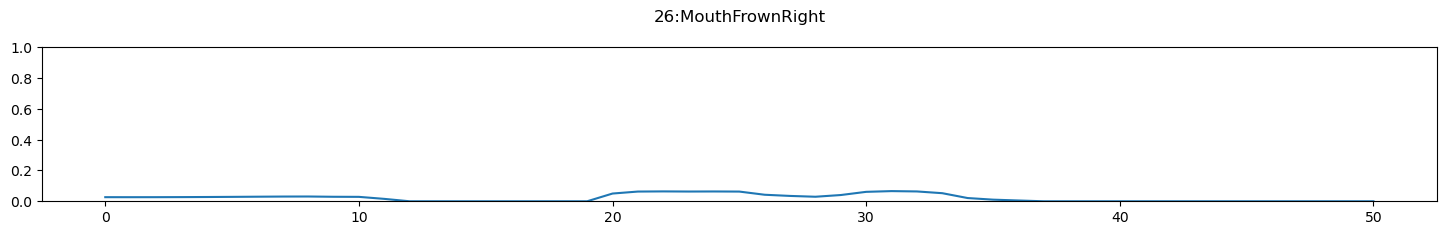

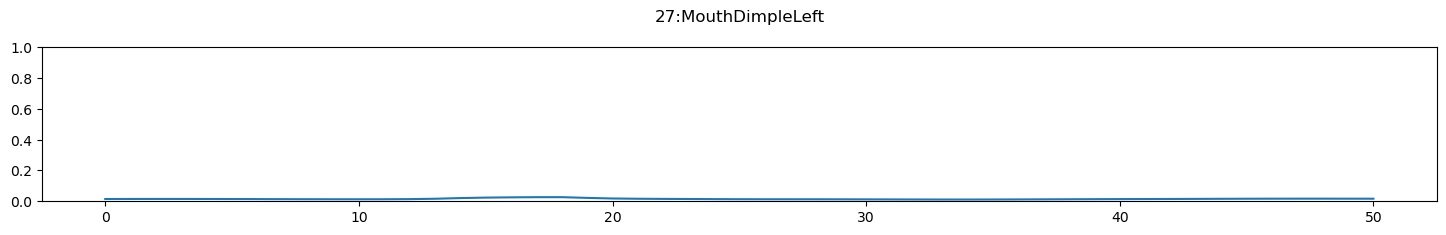

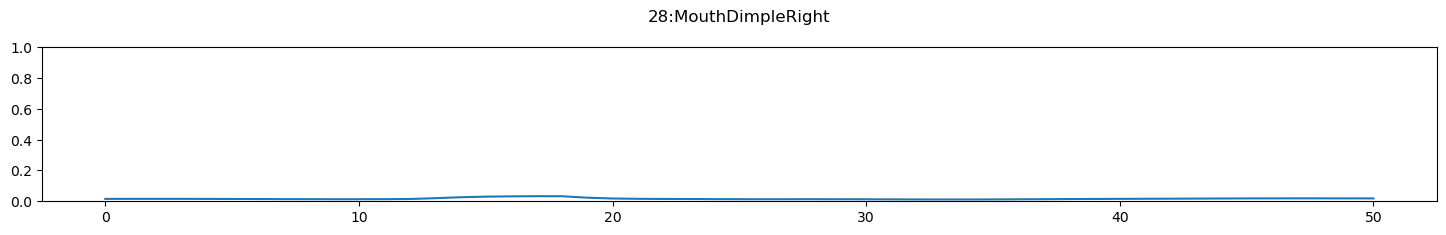

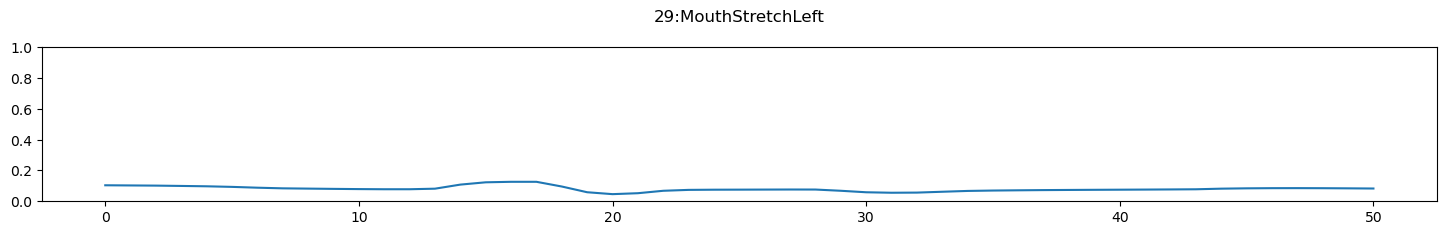

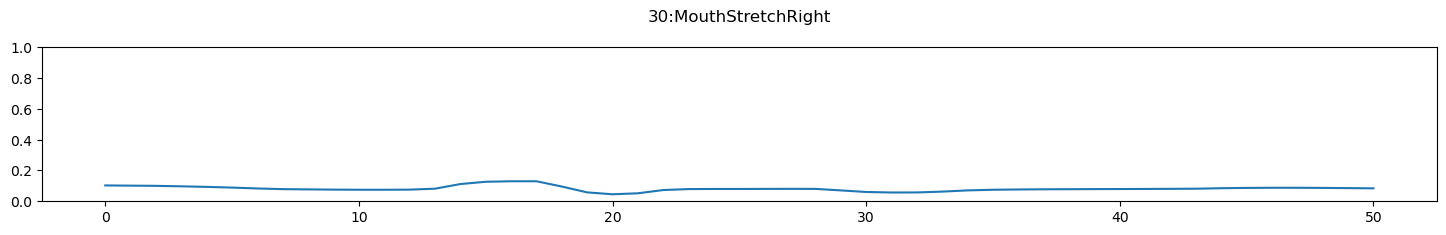

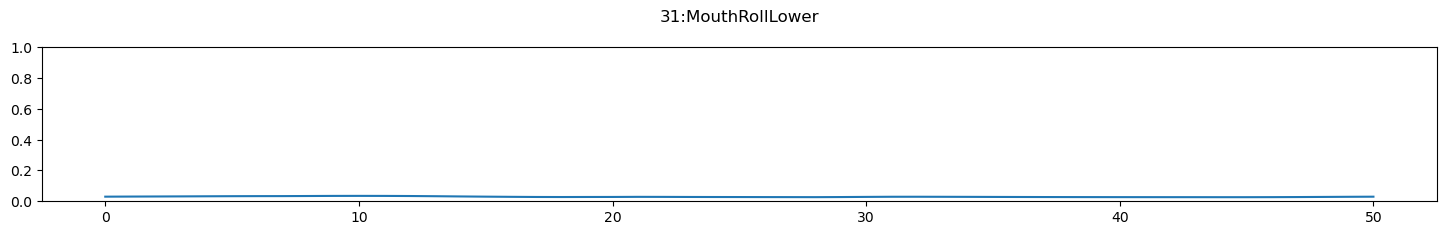

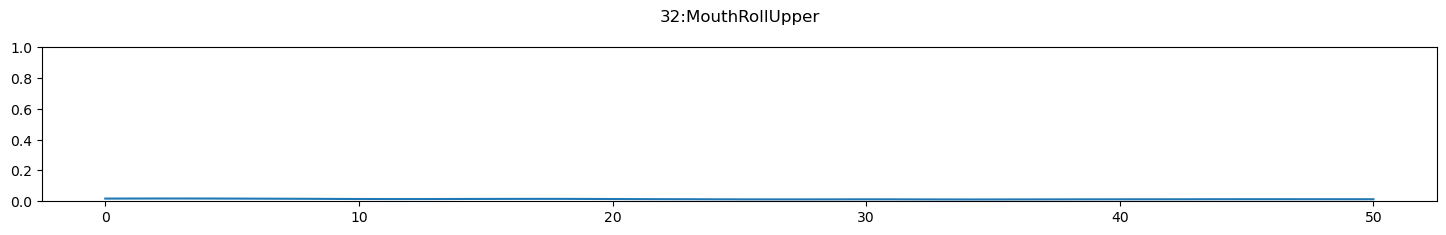

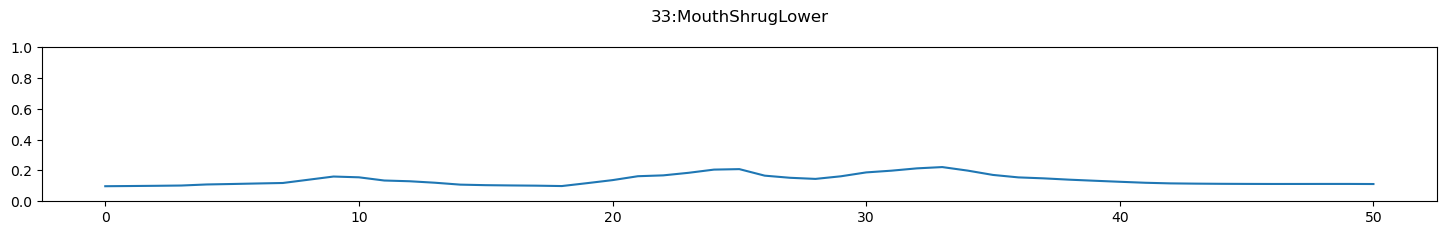

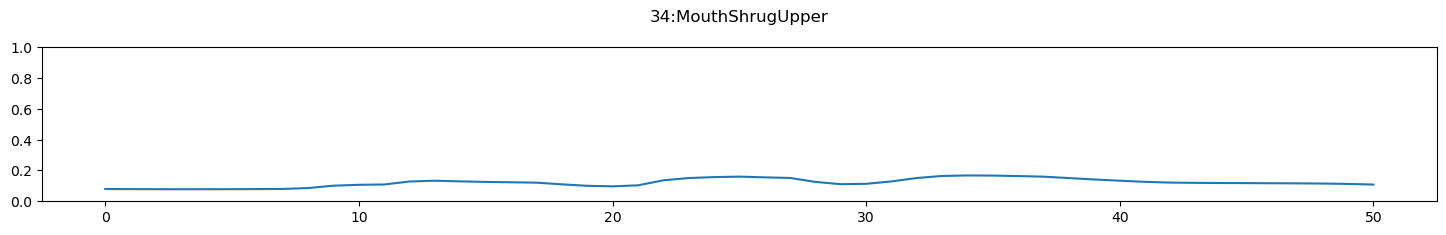

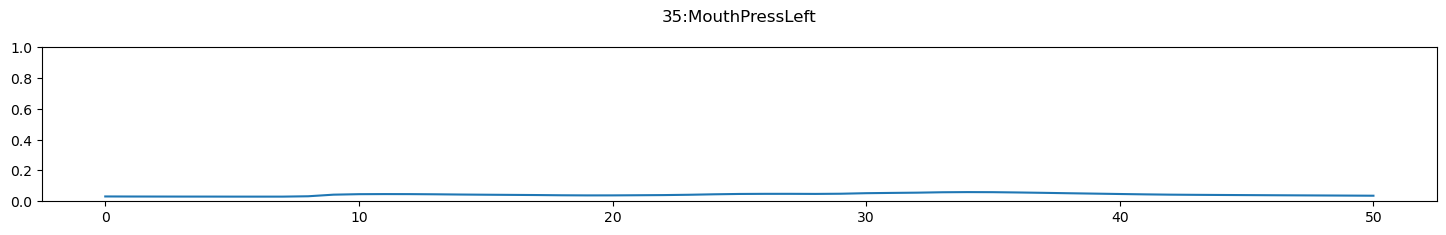

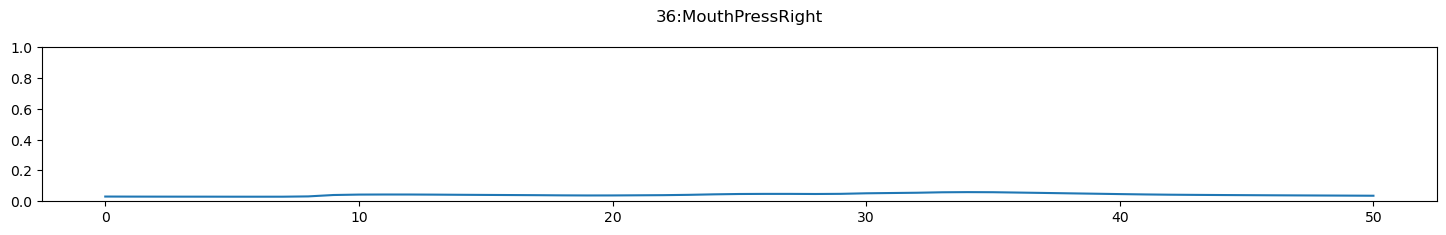

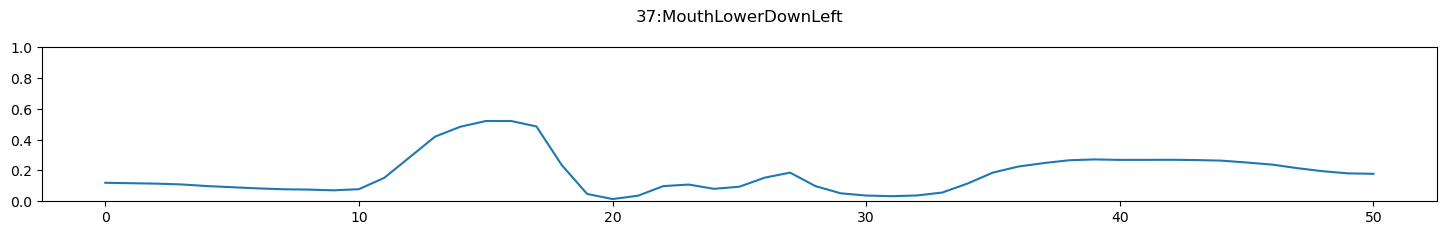

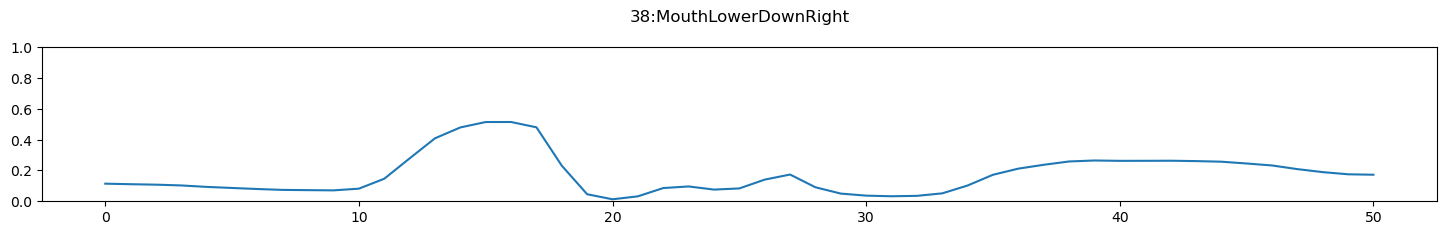

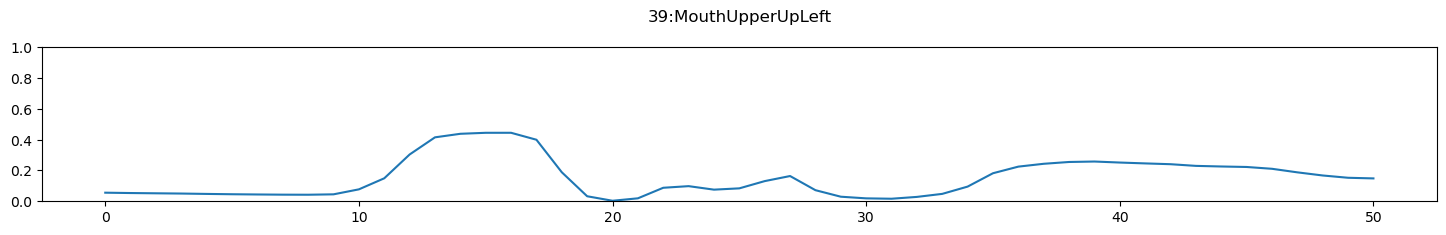

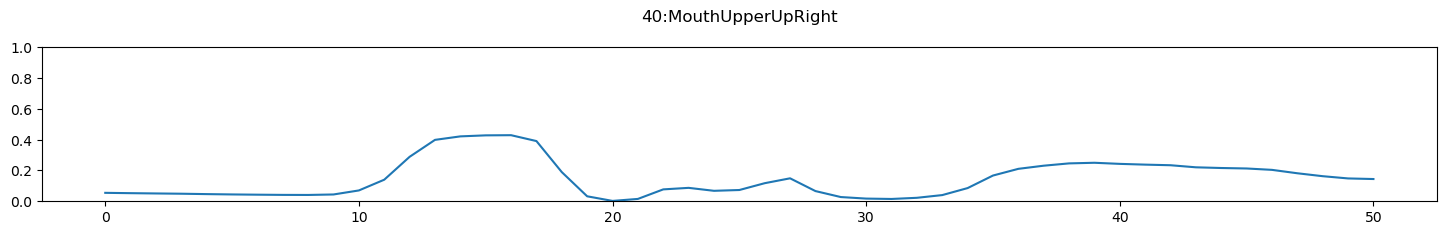

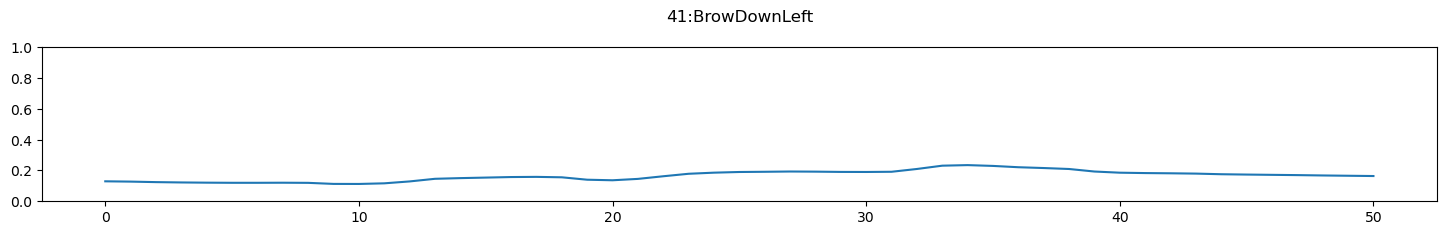

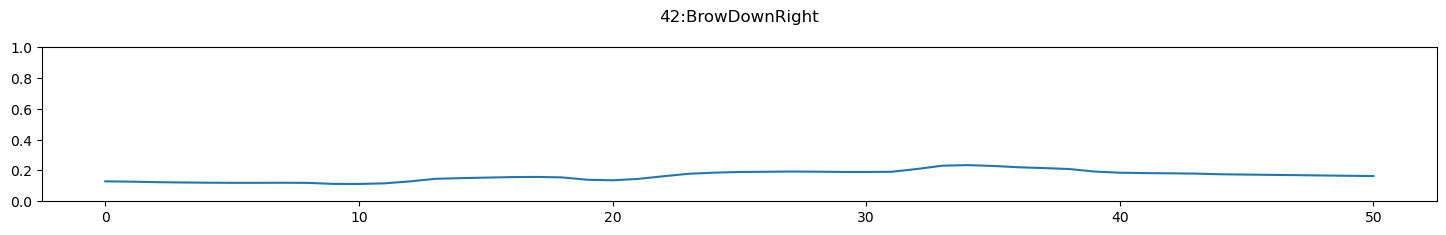

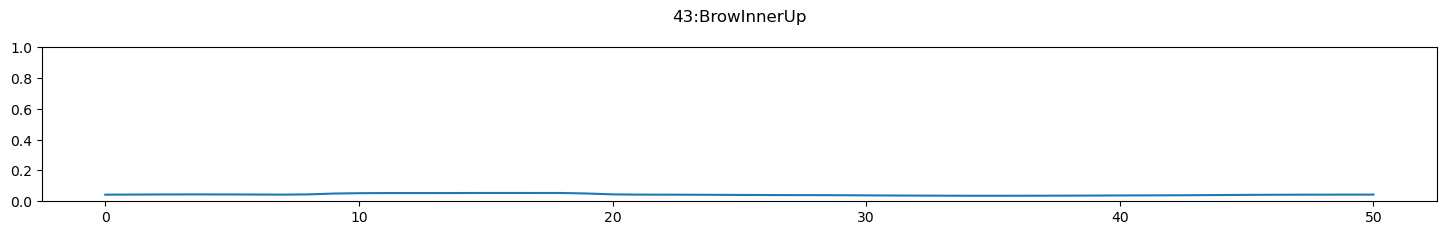

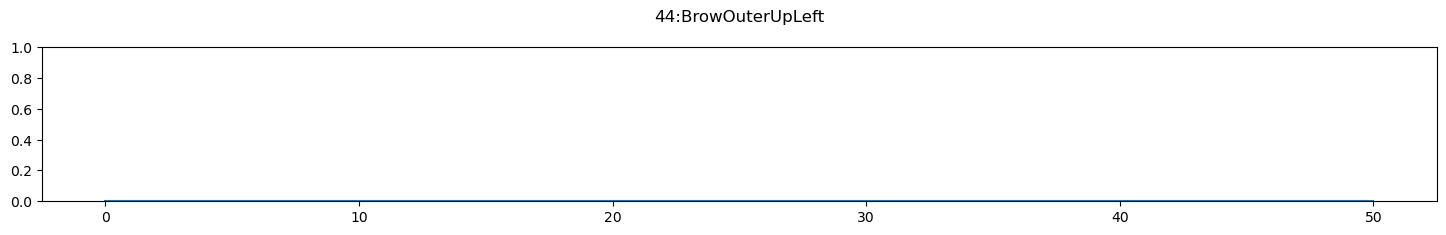

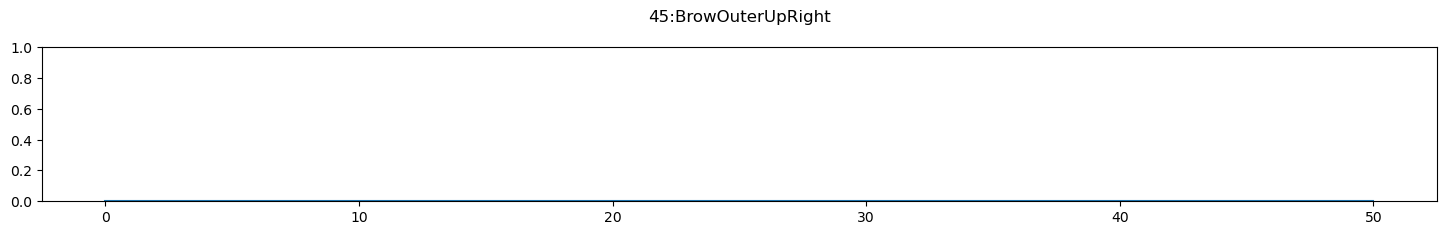

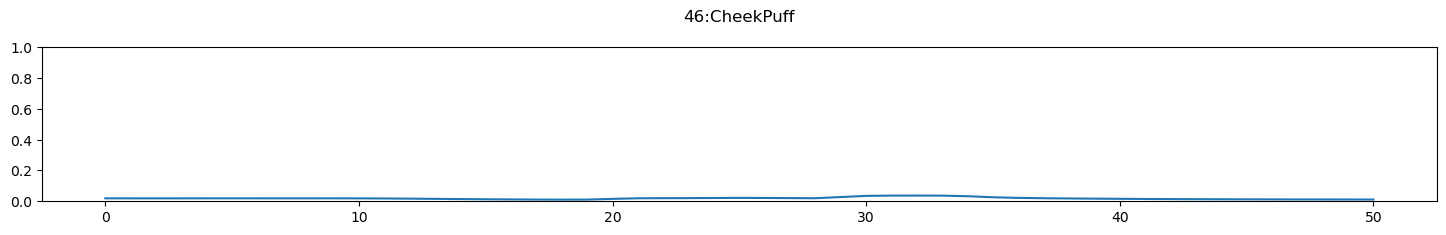

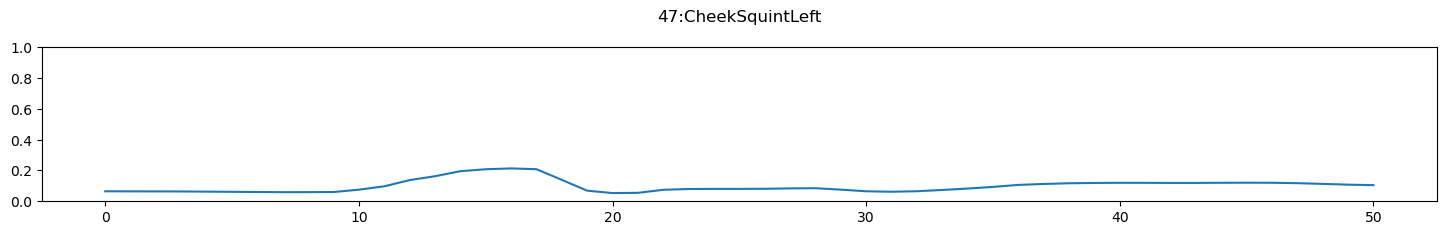

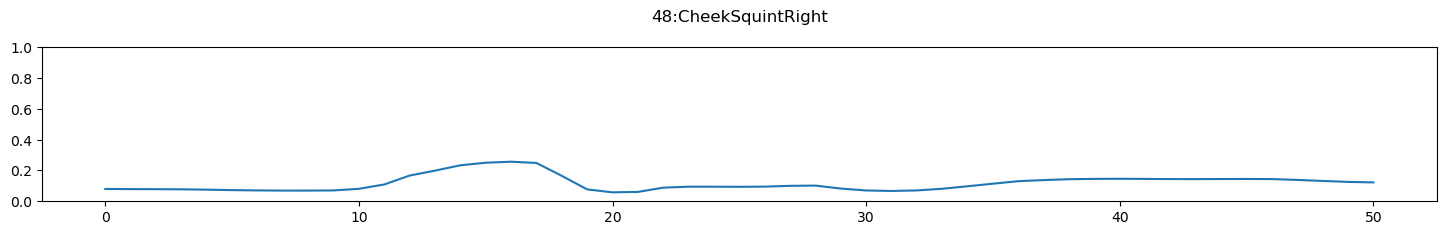

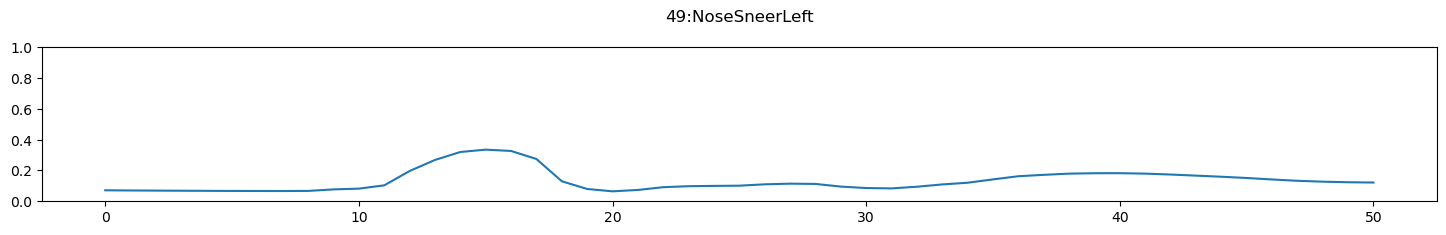

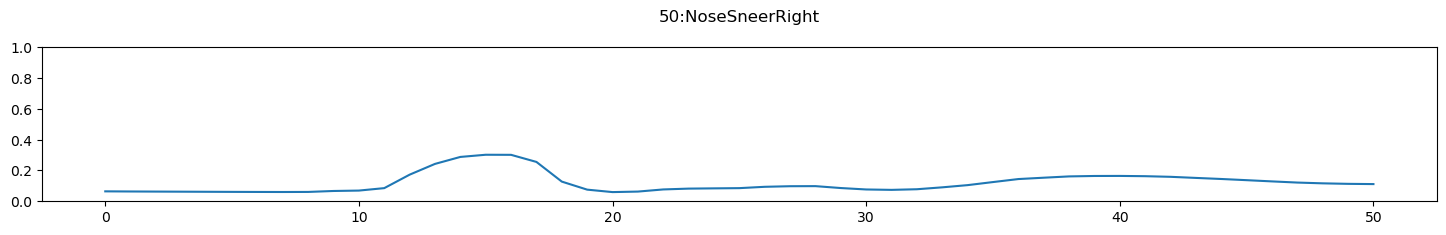

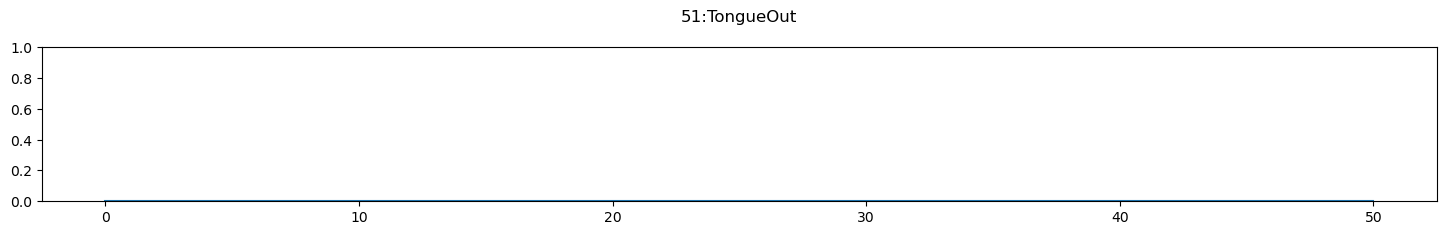

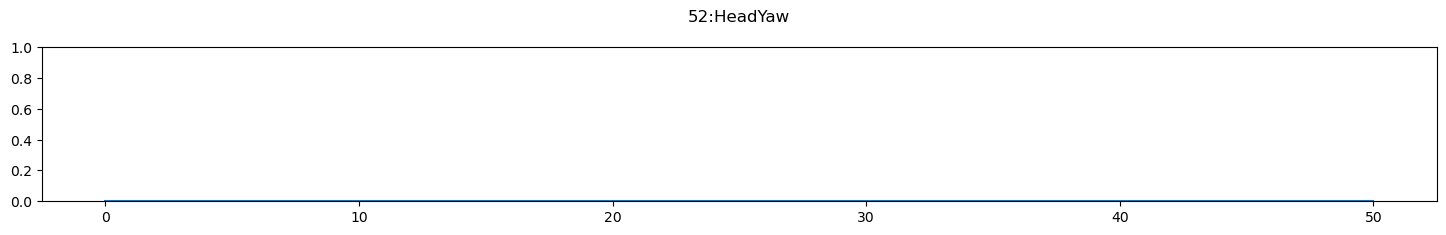

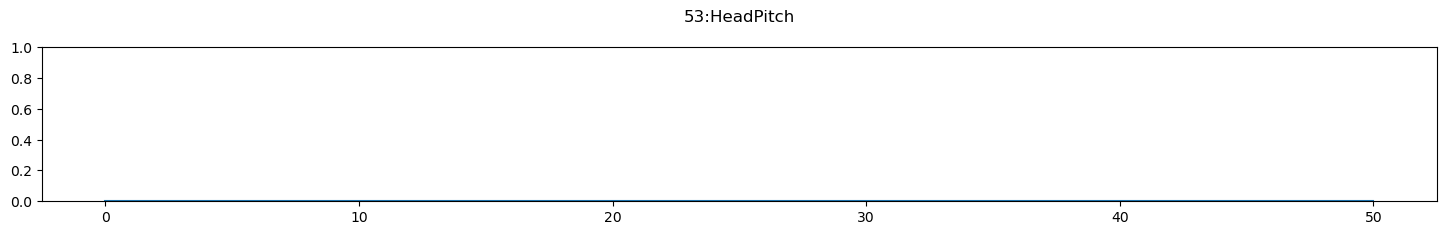

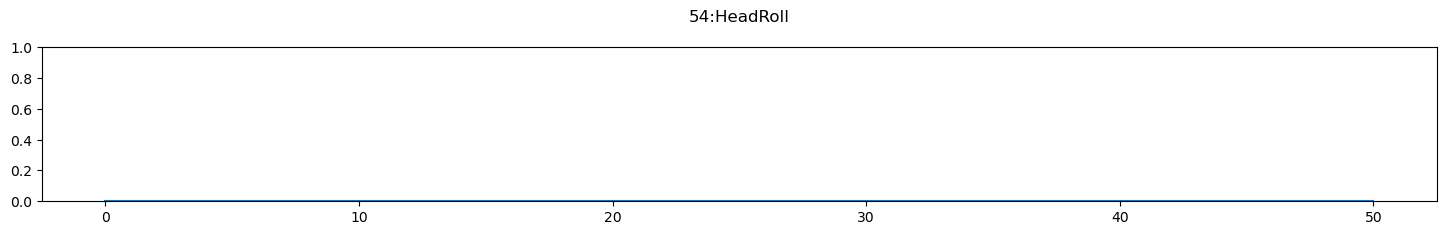

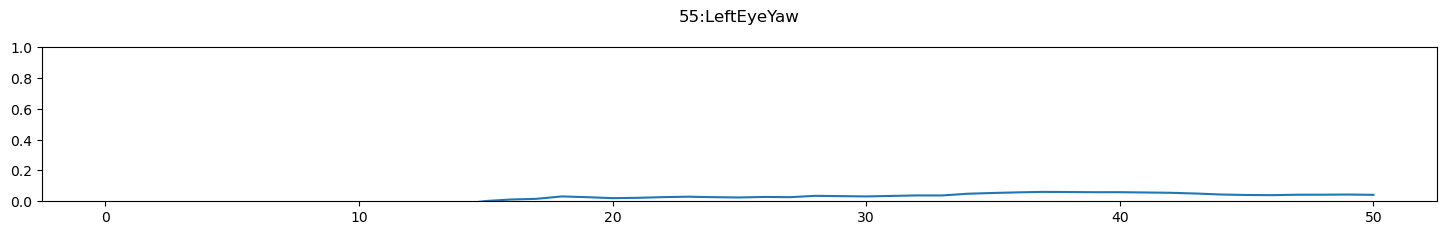

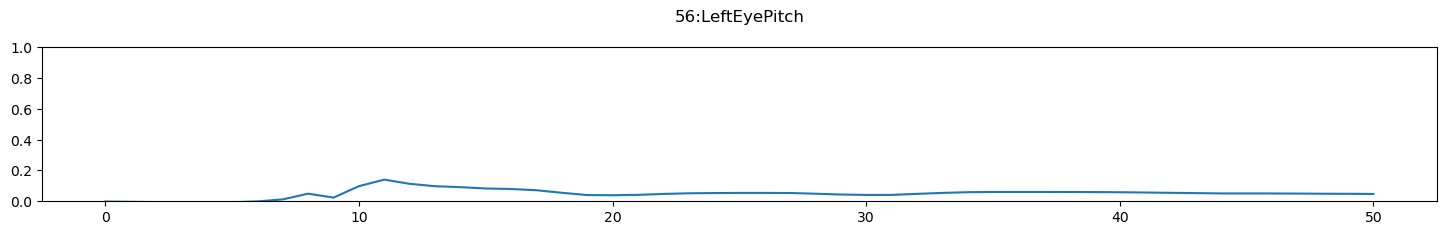

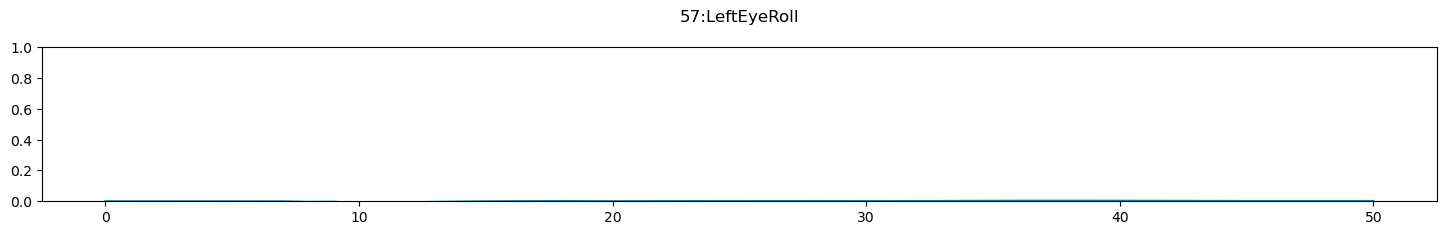

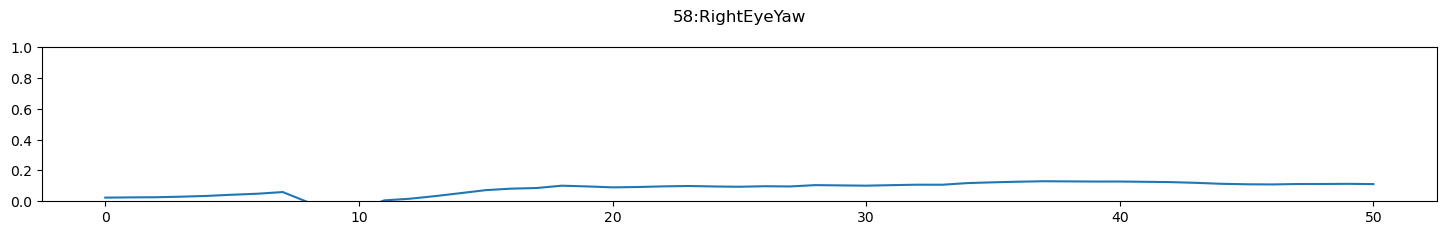

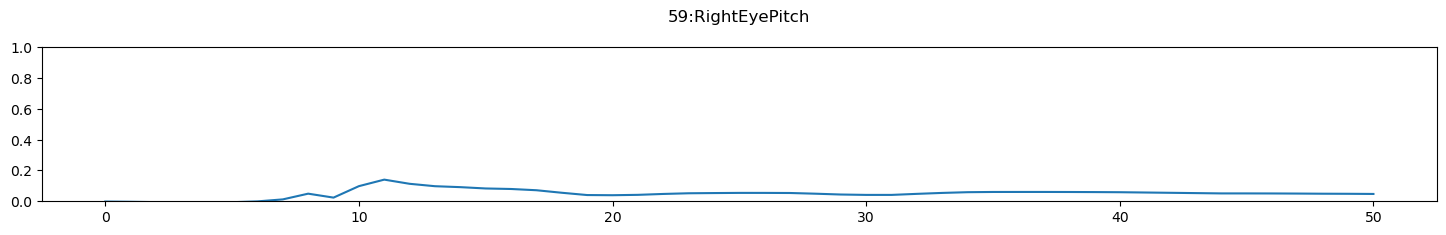

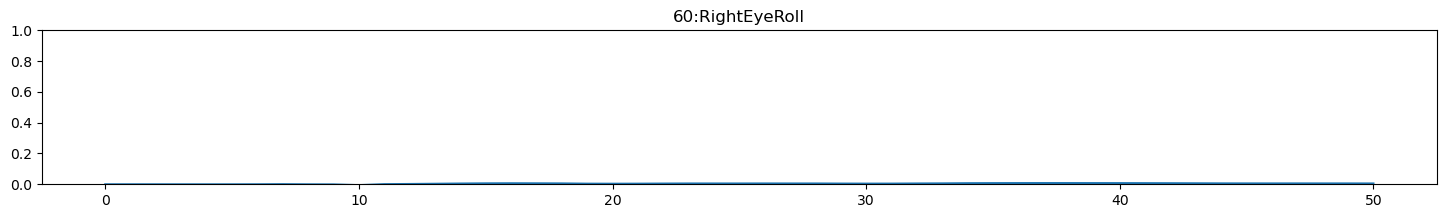

In [38]:
import matplotlib.pyplot as plt

with open('arkit.txt', 'r') as f:
    blend_names = f.readlines()
    
for i in range(61):  
    plt.figure(figsize=[18, 2])
    plt.title(str(i) + ':' + blend_names[i])
    plt.plot(data['blendshapes'][int(start*30):int(end*30), i])
    plt.ylim([0, 1])
    plt.show()